<a href="https://colab.research.google.com/github/ManuelGerardo/Natural-Language-Processing/blob/master/MNA_NLP_semana_03_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 03**
###**Expresiones regulares.**

En esta actividad deberás utilizar los datos del archivo llamado **imdb_labelled.txt** y que puedes encontrar dentro del archivo llamado **sentiment labelled sentences.zip** en la liga de la página de la UCI: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

# Nombre y matricula del estudiantes: 
#Manuel Gerardo Licera Aguirre A00947315

# Fecha: 30/04/2023

# Liga de repositorio en Github del Equipo:

# https://github.com/ManuelGerardo/Natural-Language-Processing/blob/master/MNA_NLP_semana_03_Actividad.ipynb

*   **Parte 1.**   Cargar los datos del archivo indicado y crear un DataFrame de Pandas. Debes incluir los nombres de las columnas y verificar que la dimensión del DataFrame es 2748x1000. 

In [3]:
import pandas as pd
import re

# Leer el archivo "imdb_labelled.txt"
df = pd.read_csv("imdb_labelled.txt", delimiter="\t", header=None)

# Asignar los nombres de las columnas al DataFrame
df.columns = ["sentence", "label"]

pd.set_option('display.max_colwidth', None)

In [4]:
print(df.shape)

(748, 2)


In [5]:
with open('imdb_labelled.txt',        # puedes actualizar la ruta a tu archivo, en dado caso.
          mode='r',     # abrimos el archivo en modo lectura.
          ) as f:
    docs = f.readlines()    # separamos cada comentario por líneas

f.close()  # ya que tenemos la información en la variable docs, cerramos el archivo

#type(docs) == list  
#docs[10:25] 

*   **Parte 2.** De la columna 'review' del DataFrame deberás llevar a cabo el proceso de limpieza necesario para tener 1000 registros, en lugar de 748, como se indica en la página de la UCI. Usa todas las expresiones regulares que consideres adecuadas para ello.

In [6]:
texto_limpio = []
for linea in docs:
    linea_limpia = linea.strip().replace('\t', ' ')
    texto_limpio.append(linea_limpia)

#texto_limpio[10:25]

In [7]:
data = {'Review': [], 'Label': []}
for line in texto_limpio:
    line = line.strip()
    review, label = line.rsplit(' ', 1)
    data['Review'].append(review)
    data['Label'].append(label)

df_limpio = pd.DataFrame(data)

In [9]:
print(df_limpio.shape)

(1000, 2)


*   **Parte 3.** Realiza el proceso de tokenización con los 1000 comentarios obtenidos en el inciso anterior. 

In [10]:
import nltk
nltk.download('punkt')  # Descargar los datos necesarios para tokenizar

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# Tokenizar el texto de la columna 'Review'
df_limpio['Tokens'] = df_limpio['Review'].apply(nltk.word_tokenize)

In [12]:
df_limpio['NumTokens'] = df_limpio['Tokens'].apply(len)
print(df_limpio['NumTokens'])

0      18
1      21
2      33
3       9
4      22
       ..
995    12
996    17
997     8
998     3
999    17
Name: NumTokens, Length: 1000, dtype: int64


*   **Parte 4.** Lleva a cabo el proceso de entrenamiento y validación con el modelo de Regresión Logística. Verifica que el modelo no esté sobreentrenado, con una diferencia máxima entre entrenamiento y validación del 1.5%.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Dividir los datos en un conjunto de entrenamiento y un conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(df_limpio['NumTokens'], df_limpio['Label'], test_size=0.2, random_state=1010)

In [14]:
# Crear un modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42)

X_train_2d = np.array(X_train.tolist()).reshape(-1, 1)
X_val_2d = np.array(X_val.tolist()).reshape(-1, 1)

lr_model.fit(X_train_2d, y_train.tolist())
train_preds = lr_model.predict(X_train_2d)
val_preds = lr_model.predict(X_val_2d)

In [15]:
# Calcular la exactitud (accuracy) del modelo en los datos de entrenamiento y validación
train_accuracy = accuracy_score(y_train.tolist(), train_preds)
val_accuracy = accuracy_score(y_val.tolist(), val_preds)

print("Exactitud en los datos de entrenamiento: {:.2f}%".format(train_accuracy * 100))
print("Exactitud en los datos de validación: {:.2f}%".format(val_accuracy * 100))

# Calcular la diferencia porcentual entre la exactitud de entrenamiento y validación
diff_percent = abs(train_accuracy - val_accuracy) / train_accuracy * 100
print("Diferencia porcentual entre entrenamiento y validación: {:.2f}%".format(diff_percent))

if diff_percent <= 1.5:
    print("El modelo no está sobreentrenado.")
else:
    print("El modelo está sobreentrenado.")

Exactitud en los datos de entrenamiento: 52.75%
Exactitud en los datos de validación: 53.50%
Diferencia porcentual entre entrenamiento y validación: 1.42%
El modelo no está sobreentrenado.


*   **Parte 5** Obtener la matriz de confusión con los datos de prueba, su interpretación y tus conclusiones finales de la actividad.

In [16]:
from sklearn.metrics import confusion_matrix

# Predecir las etiquetas de prueba
test_preds = lr_model.predict(X_val_2d)

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, test_preds)


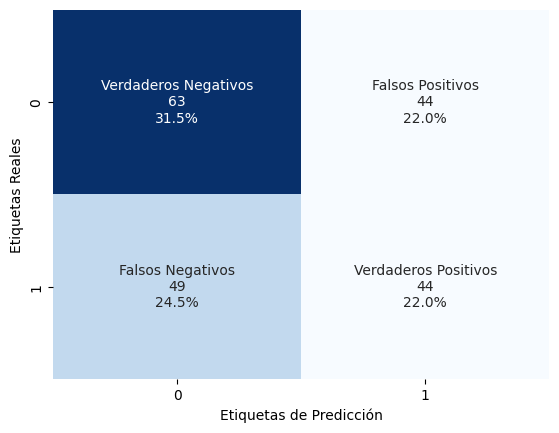

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 

txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()


Para un modelo de NLP, esto podría significar que el modelo está aprendiendo a clasificar los datos de entrenamiento basándose en patrones muy específicos y ruidosos en los datos de entrenamiento, en lugar de patrones más generalizables que se apliquen a datos nuevos y desconocidos.

Esto puede ser problemático para un modelo de NLP porque es posible que el modelo no pueda generalizar bien a nuevos datos de texto que no se parecen exactamente a los datos de entrenamiento. Además, es posible que el modelo esté sobreajustando a ciertas palabras o frases específicas en los datos de entrenamiento que no son relevantes para la tarea de clasificación en general.



###Fin de la Actividad de la semana 3.